<a href="https://colab.research.google.com/github/kimhalyn/COLAB/blob/main/4_1_%EB%94%A5%EB%9F%AC%EB%8B%9DDNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/02/08
이름 : 김하린
내용 : 딥러닝 DNN 이미지 분류 실습하기
"""

'\n날짜 : 2021/02/08\n이름 : 김하린\n내용 : 딥러닝 DNN 이미지 분류 실습하기\n'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import  load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import  train_test_split
from PIL import  Image

In [ ]:
#학습데이터 로드
(cifar_train_data, cifar_train_label), (cifal_test_data, cifal_test_label) = load_data()

In [ ]:
#데이터 형태 확인
print(cifar_train_data.shape)
print(cifar_train_label)

(50000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[18420 12295 48241 36875 48963  6984 11387 13613 46664]


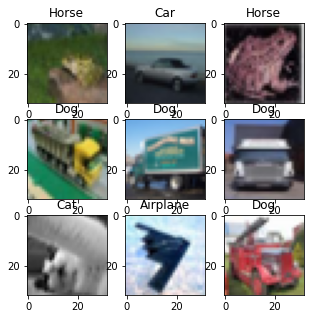

In [ ]:
#데이터 이미지 확인
data_labes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Frog', 'Horse', 'Ship', 'Truck', 'Dog']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)

  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' % data_labes[label])

In [ ]:
#데이터셋 분학하기
train_data, test_data, train_label, test_label = train_test_split(cifar_train_data, cifar_train_label)
print('학습 데이터 : ', train_data.shape)
print('검증 데이터 : ', test_data.shape)

학습 데이터 :  (37500, 32, 32, 3)
검증 데이터 :  (12500, 32, 32, 3)


In [ ]:
#데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
#학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))#입력층
model.add(Dense(64, activation='sigmoid'))#은닉층
model.add(Dense(32, activation='sigmoid'))#은닉층
model.add(Dense(10, activation='sigmoid'))#출력층

In [ ]:
#학습모델 설정
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['arc'])

In [ ]:
#학습하기
model.fit(train_data, 
          train_label, 
          epochs=30, 
          batch_size=128, 
          validation_data=(test_data, test_label))

Epoch 1/30


ValueError: ignored

In [ ]:
#평가하기